In [39]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

#### 通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [40]:
# 通过ToTensor实例将图像数据从PIL类型转化成32位浮点数形式
# 并除以255使得所有图像数值均在0到1之间
# 将shape为(H,W,C)的数据维度转变为(C,H,W),其中C表示通道数,H表示高度,W表示宽度
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data',train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data',train=False,transform=trans,download=True)

In [41]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [42]:
# 查看第一张图片的形状
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [43]:
def get_fashion_mnist_labels(labels):
    '''返回Fashion-MNIST数据集的文本标签'''
    text_labels = ['t-shirt','trouser','pullover','derss','coat','sanal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

In [44]:
# 显示图片
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    '''plot a list of images'''
    figsize = (num_cols * scale,num_rows*scale)
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            # 图片数量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)

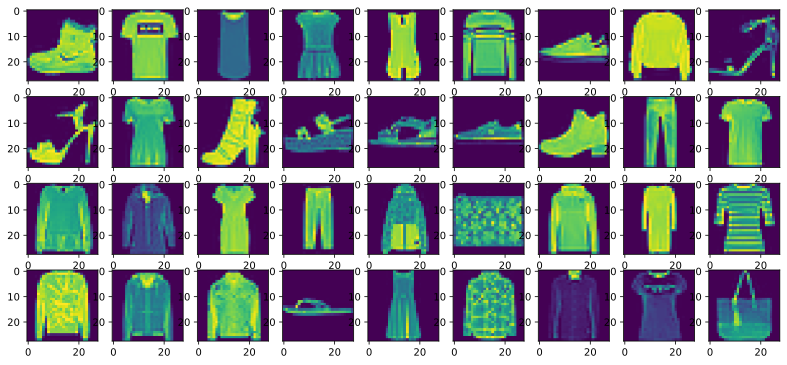

In [45]:
# next和iter构成迭代
X,y = next(iter(data.DataLoader(mnist_train, batch_size=36)))
show_images(X.reshape(36,28,28),4,9,titles=get_fashion_mnist_labels(y))

#### 读取小批量数据  batch_size

In [50]:
batch_size = 256

# 使用四个进程
def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.39 sec'

In [52]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))